#### Topic : This homework illustrates the working of PCA for dimensionality reduction.

##### KNN Classifier without PCA

In [1]:
import numpy as np

class KNN:
    def __init__(self, k):
        self.k = k
    
    # The fit() method is to train the KNN model. It takes in the training data X_train and their corresponding labels y_train as input. The "X_train" data is stored as an instance variable self.X_train and the y_train labels are stored as self.y_train
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        # here we are computing distances b/w samples in X_test and samples in out training data i.e. X_train
        distances = self.compute_distances(X_test)
        
        # Below line of code finds the indices of the k-nearest neighbours for each sample in X_test by sorting the distances array along the second axis and then taking the first k columns. These indices are then used to extract the corresponding labels from self.y_train, which are stored in a variable called k_nearest_nbrs.
        k_nearest_nbrs = self.y_train[np.argsort(distances)[:, :self.k]]
        
        y_predicted = []
        # Below loop calculates the majority vote of the k-nearest neighbor labels and appends it to y_predicted
        for labels in k_nearest_nbrs:
            y_predicted.append(np.bincount(labels).argmax())
        return y_predicted
    
    def evaluate(self, X_test, y_test):
        # here below line of code will predict labels for out test samples using predict() method 
        y_predicted = self.predict(X_test)
        # Below line of code compares the predicted labels with the ground truth labels using the == operator, which returns a boolean array with True for correctly predicted labels and False for incorrectly predicted labels. The sum function is then used to count the number of True values, which represents the number of correctly predicted labels. This count is divided by the total number of samples in y_test to calculate the accuracy
        accuracy = sum(y_predicted == y_test) / len(y_test)
        return accuracy
    
    def compute_distances(self, X):
        # here in below line of code we are calculating no of rows in X
        no_of_samples_in_X = X.shape[0]
        # here in below line of code we are calculating no of rown in our training sample for further iteration over loop 
        total_no_of_training_samples = self.X_train.shape[0]
        # here we are declaring a numpy array so that we can store distances between samples in X and samples in our training data
        distances = np.zeros((no_of_samples_in_X, total_no_of_training_samples))
        # here we are iterating 
        for i in range(no_of_samples_in_X):
            for j in range(total_no_of_training_samples):
                # below line  calculates the Euclidean distance between the i-th sample in X and the j-th training sample in self.X_train.
                distances[i][j] = np.sqrt(np.sum(np.square(X[i] - self.X_train[j])))
        return distances

In [2]:
# This whole code block reads the training and test data using pandas, extracts the feature values and labels, and stores them in numpy arrays for further processing in a machine learning model.
import pandas as pd

train_data = pd.read_csv('optdigits_train.txt')
test_data =pd.read_csv('optdigits_test.txt')

X_train = train_data.iloc[:, 0:-1].values
y_train = train_data.iloc[:, -1].values

X_test = test_data.iloc[:, 0:-1].values
y_test = test_data.iloc[:, -1].values

These are the [k_value,error_rate] :  [[1, '0.054'], [3, '0.041'], [5, '0.044'], [7, '0.054']]


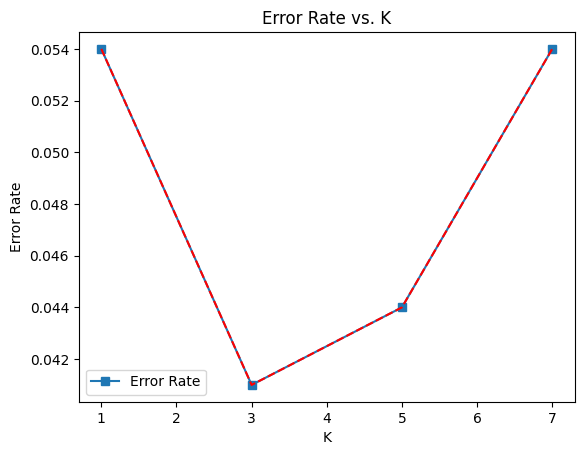

In [3]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

error_rates = []
k_values = [1,3,5,7]

# We are iterating over a list of values for k, creating a KNN model for each value of k, fitting the model to the training data (X_train, y_train), predicting the class labels for the test data (X_test), calculating the accuracy and error rate of the predictions using the true labels (y_test), and storing the error rates in a list. The final result is a list of error rates for each value of k.
for k in k_values:
  knn = KNN(k = k)
  knn.fit(X_train, y_train)
  y_predicted = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_predicted)
  error_rate = 1 - accuracy
  error_rate = "{:.3f}".format(error_rate)
  error_rates.append([k,error_rate])
print("These are the [k_value,error_rate] : ",error_rates)

# Below code is for plotting the k values with error_rates or we can sat performance evaluation graph 
error_rate_vals = [float(x[1]) for x in error_rates]
plt.plot(k_values, error_rate_vals, marker='s', markersize=6, label='Error Rate')
plt.plot(k_values, error_rate_vals, linestyle='--', color='red')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. K')
plt.legend()
plt.show()

##### PCA Implementation

In [4]:
import numpy as np
import pandas as pd

def myPCA(data, no_of_PC):
    # data - np.mean(data, axis=0) subtracts the mean values from the data along each feature axis, resulting in a new array where each value is normalized with respect to the mean of its corresponding feature.
    # The result is stored in a new array called normalized_data, which contains the normalized values of the original data. This is commonly done in data preprocessing to center the data around zero and remove any bias caused by differences in feature scales.
    normalized_data = data - np.mean(data, axis=0)
    # here we are calculating the covariance matrix
    cov_matrix = np.cov(normalized_data.T)

    # In linear algebra, a square matrix (such as a covariance matrix) can often be represented as a linear transformation that scales and rotates vectors in the space. Eigenvectors are special vectors that, when multiplied by this linear transformation, only get scaled (stretched or compressed), but their direction remains unchanged. The scaling factor for each eigenvector is called the eigenvalue. In other words, eigenvectors represent the directions along which the covariance matrix has the most significant variance, and eigenvalues represent the amount of variance along those directions.
    # In the given code line, np.linalg.eig(cov_matrix) is a function from the NumPy library that calculates the eigenvalues and eigenvectors of the covariance matrix cov_matrix. The resulting eigenvalues are stored in the eigen_values variable, and the eigenvectors are stored in the eigen_vectors variable. These eigenvalues and eigenvectors can be used in PCA to perform dimensionality reduction or feature extraction for a given dataset.
    eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)


    # 5 3 4 2 1
    # 0 1 2 3 4
    # 5 4 3 2 1
    # 0 2 1 3 4
    # Sort the eigenvectors in descending order of their corresponding eigenvalues
    sorted_indices = np.argsort(eigen_values)[::-1]
    sorted_eigen_values = eigen_values[sorted_indices]
    sorted_eigen_vectors = eigen_vectors[:, sorted_indices]

    # principal_components will store the top no_of_PC eigenvectors
    principal_components = sorted_eigen_vectors[:, :no_of_PC]

    # finally the method will return required no of principal components and eigen_values corresponding to that principal components
    return principal_components, sorted_eigen_values[:no_of_PC]

# Applying PCA to the training data set
pcs, eigen_values = myPCA(train_data.iloc[:, :-1], 5)

# here we are printing the 1st (1 of all principal components)
print("1st PC:", pcs[:, 0])

1st PC: [ 0.00000000e+00  1.75705502e-02  2.28230139e-01  1.49710553e-01
  1.73974247e-02  6.63478709e-02 -7.19332497e-03 -4.87988195e-03
  3.75471944e-04  1.22594496e-01  2.52248355e-01 -1.50368535e-01
  2.97663216e-02  1.87626391e-01 -4.13131178e-03 -6.22216946e-03
  5.83344477e-05  8.53440264e-02 -7.58571161e-02 -2.20353192e-01
  1.60701267e-01  1.41383382e-01 -3.88179481e-02 -4.96715344e-03
 -1.23249192e-04 -6.25534576e-02 -2.45794480e-01  3.74977738e-02
  1.95927523e-01  3.92507424e-02 -5.42111584e-02 -2.71894815e-04
  0.00000000e+00 -1.54518435e-01 -3.61724034e-01 -1.66000552e-01
 -1.00600915e-01 -3.15148158e-02 -1.79694261e-02  0.00000000e+00
 -1.27806527e-03 -1.01482478e-01 -2.81296790e-01 -2.52109285e-01
 -2.38225123e-01 -7.52219246e-03  5.63008132e-02 -1.71593379e-03
 -8.45346483e-04  1.06802717e-02  8.14508651e-02 -8.58305405e-02
 -1.24437113e-01  1.59641757e-01  8.83246171e-02 -1.26252035e-03
 -1.81446131e-05  1.40943205e-02  2.37525256e-01  1.51250488e-01
  2.63398882e-02 

##### KNN Classifier with PCA

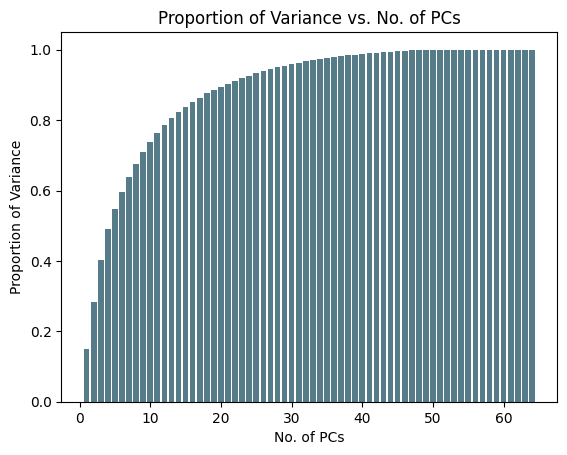

No. of principal components(Eigen Vectors) having atleast 90% of the variance: 21
These are the [k_value,error_rate] :  [[1, '0.047'], [3, '0.047'], [5, '0.054'], [7, '0.054']]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get the optimal number of principal components that explain at least 90% of the variance
# Load the Optdigits training and test sets
X_train = pd.read_csv('optdigits_train.txt')
X_test = pd.read_csv('optdigits_test.txt')
# here in below line of code we have taken only eigenvalues as at the end we have added [1] 
eigvals = myPCA(X_train.iloc[:, :-1], X_train.shape[1]-1)[1]
variance_ratios = eigvals / np.sum(eigvals)
# Here I am computing the cumulative variance ratios by taking the cumulative sum of the variance ratios.
cumulative_variance_ratios = np.cumsum(variance_ratios)

# Finding the optimal number of principal components by finding the index of the cumulative variance ratios that first exceeds or equals 0.9, and adding 1 to it to account for zero-based indexing. This value is stored in optimal_k_PCs.
optimal_k_PCs = np.argmax(cumulative_variance_ratios >= 0.9)+1

# Plotting Proportion of Variance vs. No. of PCs
plt.bar(range(1, len(cumulative_variance_ratios) + 1), cumulative_variance_ratios , color='#567B89',)
plt.xlabel('No. of PCs')
plt.ylabel('Proportion of Variance')
plt.title('Proportion of Variance vs. No. of PCs')
plt.show()



# here below line of code is printing the optimal no of PCs having atleast 90% variance
print('No. of principal components(Eigen Vectors) having atleast 90% of the variance:', optimal_k_PCs)

# Project the training and test sets to the optimal number of principal components
pcs = myPCA(X_train.iloc[:, :-1], optimal_k_PCs)[0]

X_train_pca = np.dot(X_train.iloc[:, :-1], pcs)
X_test_pca = np.dot(X_test.iloc[:, :-1], pcs)

y_train = np.array(X_train.iloc[:, -1])
y_test = np.array(X_test.iloc[:, -1])

# Define the KNN classifier with k=1,3,5,7
k_values = [1, 3, 5, 7]
errorrates = []
for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train_pca, y_train)
    accuracy = knn.evaluate(X_test_pca, y_test)
    error_rate = 1 - accuracy
    error_rate = "{:.3f}".format(error_rate)
    errorrates.append([k,error_rate])

print("These are the [k_value,error_rate] : ",errorrates)


##### Component Plotting

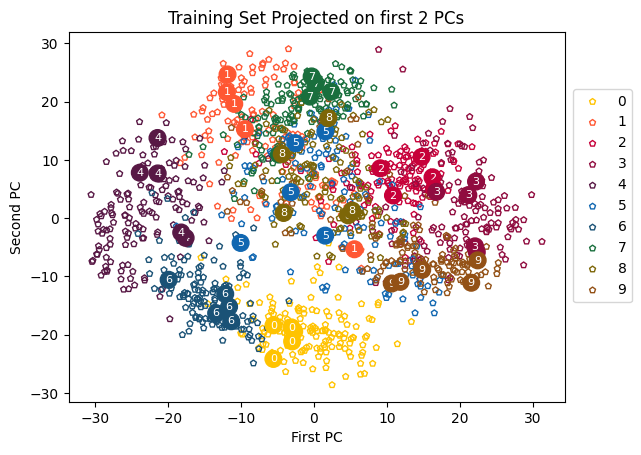

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

colors = ['#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845', '#1167b1', '#1A5276', '#196F3D', '#7D6608', '#935116']

# Applying PCA to the dataset and projecting onto the first two PC's
pcs = myPCA(X_train.iloc[:, :-1], 2)[0] 
optdigits_train_pca = np.dot(X_train.iloc[:, :-1], pcs) 

# Create a scatter plot of the projected training data
for digit in range(10): 
    # x-coordinate values of the current digit's data points
    x = optdigits_train_pca[X_train.iloc[:, -1] == digit, 0] 
    # y-coordinate values of the current digit's data points
    y = optdigits_train_pca[X_train.iloc[:, -1] == digit, 1] 
    # ploting the data points for the current digit with the colour choosen from the color list
    plt.scatter(x, y, marker='p', s=20, facecolors='none', edgecolors=colors[digit], label=str(digit)) 

    # randomly choose five data points from the current digit
    indices = np.random.choice(np.where(X_train.iloc[:, -1] == digit)[0], size=5, replace=False) 
    for i in indices: 
        # make sure the current data point belongs to the current digit
        if X_train.iloc[i,-1] == digit: 
            # boz style of the box
            bbox = dict(boxstyle='circle', fc=colors[digit], ec=colors[digit]) 
             # adding digit label to the data points
            plt.text(optdigits_train_pca[i,0], optdigits_train_pca[i,1], str(digit), color='white', fontsize=8, ha='center', va='center', bbox=bbox)


plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.title('Training Set Projected on first 2 PCs')
plt.legend(bbox_to_anchor=(1.15,0.25), loc='lower right')
plt.show()


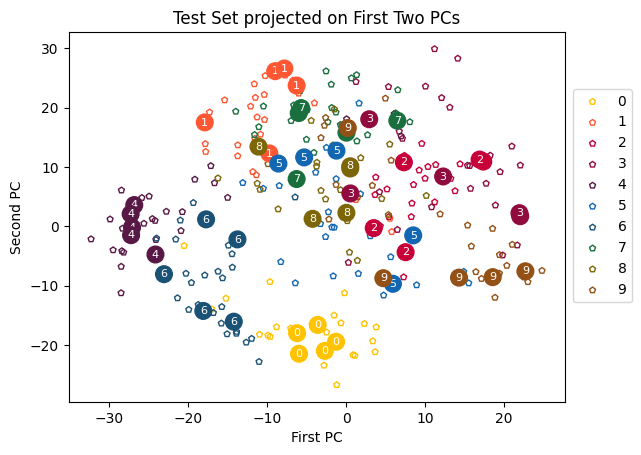

In [7]:
optdigits_test_pca = np.dot(X_test.iloc[:, :-1], pcs) 
for digit in range(10):
    x = optdigits_test_pca[X_test.iloc[:, -1] == digit, 0]
    y = optdigits_test_pca[X_test.iloc[:, -1] == digit, 1]
    color = colors[digit]
    plt.scatter(x, y, marker='p', s=20, facecolors='none', edgecolors=color, label=str(digit))
    indices = np.random.choice(np.where(X_test.iloc[:, -1] == digit)[0], size=5, replace=False)
    for i in indices:
        if X_test.iloc[i,-1] == digit:
            bbox = dict(boxstyle='circle', fc=color, ec=color)
            plt.text(optdigits_test_pca[i,0], optdigits_test_pca[i,1], str(digit), color='white', fontsize=8, ha='center', va='center', bbox=bbox)

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.title('Test Set projected on First Two PCs')
plt.legend(bbox_to_anchor=(1.15,0.25), loc='lower right')

plt.show()